##**★ 다음과 같이 작성해보세요.**
- 다음과 같이 검색하여 파일을 생성합니다. 파일이름은 임의로 설정합니다.
 - 기상자료개발포털 : http://data.kma.go.kr --> '기후통계분석' --> '통계분석' --> '조건별 통계'
 - 기간 : 일, 2010 ~ 2023
 - 월 : 1 ~ 12, 일 : 1 ~ 31

###**1. 데이터 불러오기**

In [180]:

import pandas as pd

#cp949 혹은 euc-kr를 사용하여 파일의 내용을 한글 형식으로 변경
temp = pd.read_csv("data/extremum_20240626151849.csv", header=0, encoding="cp949")
temp.head()


,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각일교차,Unnamed: 8
0,\t\t108,서울,2010-01-01,-7.6,-3.6,15:01,-12.7,6:54,9.1
1,\t\t108,서울,2010-01-02,-3.6,0.2,15:24,-7.4,23:59,7.6
2,\t\t108,서울,2010-01-03,-6.8,-3.2,14:38,-10.5,7:48,7.3
3,\t\t108,서울,2010-01-04,-5.9,-3.4,14:25,-8.0,24:00:00,4.6
4,\t\t108,서울,2010-01-05,-9.9,-7.0,15:06,-12.3,23:33,5.3


###**2. 데이터 셋 재조정**
 - 지점번호, 지점명을 제외한 데이터만 가져오기<br>
   - 변수명 = 변수명.loc[행레이블,열레이블]
 - 열이름 변경
    - 변수명.columns=['열이름', '열이름', ....]

In [181]:
# 지점번호, 지점명을 제외한 데이터만 data 변수로 저장
# 데이터프레임 변수 data의 열번호 변경 ==> '일시','평균기온','최고기온','최고기온시각','최저기온','최조기온시각','일교차'
data = temp.loc[:, '일시':]
data.columns=['일시','평균기온','최고기온','최고기온시각','최저기온','최조기온시각','일교차']
data.head()

,일시,평균기온,최고기온,최고기온시각,최저기온,최조기온시각,일교차
0,2010-01-01,-7.6,-3.6,15:01,-12.7,6:54,9.1
1,2010-01-02,-3.6,0.2,15:24,-7.4,23:59,7.6
2,2010-01-03,-6.8,-3.2,14:38,-10.5,7:48,7.3
3,2010-01-04,-5.9,-3.4,14:25,-8.0,24:00:00,4.6
4,2010-01-05,-9.9,-7.0,15:06,-12.3,23:33,5.3


###**3. 결측값 확인**
- 결측값 개수 확인 : 변수명.isnull().sum()
- 결측값 데이터 확인 : 변수명[변수명['컬럼명'].isnull( )]

In [182]:
# 결측값 개수 확인

data.isnull().sum()

일시         8
평균기온       8
최고기온       9
최고기온시각     9
최저기온       9
최조기온시각     9
일교차       10
dtype: int64

In [183]:
# 결측값 데이터 확인


###**4. 결측값 행/열 삭제**
- 결측값이 들어있는 행 전체 삭제하기 : 변수명.dropna(axis=0)
- 결측값이 들어있는 열 전체 삭제하기 : 변수명.dropna(axis=1)


In [184]:
# 결측값 행 전체 삭제
data = data.dropna(axis=0)

In [185]:
# 기본 정보 확인
data.isnull().sum()

일시        0
평균기온      0
최고기온      0
최고기온시각    0
최저기온      0
최조기온시각    0
일교차       0
dtype: int64

###**5-1. 최고기온과 해당 날짜 출력**
- ⓐ 최고기온 계산 : '최고기온' 컬럼에서 최대값 계산(max() 함수)
 - hint : 변수명['컬럼명'].max( )
- '최고기온' 컬럼에서 'ⓐ 계산된 최고기온'과 같은 데이터 검색
 - hint : 변수명[변수명['컬럼명'] == 비교값] [ ['컬럼명1', '컬럼명2', ....] ]
- index 재조정 : 변수명.reset_index( )
- '날짜', '최고온도' 컬럼 출력 : 변수명.loc[행레이블,열레이블]

```
[출력결과]
00 지역에서 최고 기온이 가장 높았던 날은 0000-00-00 로 00.0도 였습니다.
```



In [186]:
# '최고기온' 컬럼에서 '계산된 최고기온'과 같은 데이터 검색하여 maxData 변수에 저장
# maxData 데이터프레임의 index 초기화
# maxData 데이터프레임에서 '일시'와 '최고기온' 출력 - 변수명.loc[0,열이름]

maxData = data.loc[(data['최고기온'] == data['최고기온'].max()), ['일시','평균기온','최고기온','최고기온시각','최저기온','최조기온시각','일교차']]
maxData = maxData.reset_index()

print("서울 지역에서 최고 기온이 가장 높았던 날은", maxData.loc[0, '일시'], "로", maxData.loc[0, '최고기온'], "도 였습니다.")


서울 지역에서 최고 기온이 가장 높았던 날은 2018-08-01 로 39.6 도 였습니다.


###**5-2. 최저기온와 해당 날짜 출력**
- ⓑ 최저기온 계산 : '최저기온' 컬럼에서 최소값 계산(min() 함수)
- '최저기온' 컬럼에서 'ⓑ 계산된 최저기온'과 같은 데이터 검색
- index 재조정 : 변수명.reset_index( )
- '날짜', '최저온도' 컬럼 출력 : 변수명.loc[행레이블,열레이블]

```
[출력결과]
00 지역에서 최저 기온이 가장 낮았던 날은 0000-00-00 로 00.0도 였습니다.
```

In [187]:
# '최저기온' 컬럼에서 '계산된 최저기온'과 같은 데이터 검색하여 minData 변수에 저장
# minData 데이터프레임의 index 초기화
# minData 데이터프레임에서 '일시'와 '최저기온' 출력 - 변수명.loc[0,열이름]

minData = data.loc[(data['최저기온'] == data['최저기온'].min()), ['일시','평균기온','최고기온','최고기온시각','최저기온','최조기온시각','일교차']]
minData = minData.reset_index()

print("서울 지역에서 최저 기온이 가장 낮았던 날은", minData.loc[0, '일시'], "로", minData.loc[0, '최저기온'], "도 였습니다.")

서울 지역에서 최저 기온이 가장 낮았던 날은 2021-01-08 로 -18.6 도 였습니다.


###**7. 본인 생일 날짜의 기온 변화 그래프 작성**
- **1단계 : '일시' 열에서 '년'만, '월-일'만 추출하여 새로운 열 생성**
 - 인덱싱 : 변수명['컬럼명'].str[ ]
 - '년도' 열 생성 : '일시' 컬럼의 값에서 앞 4자리까지만 추출 ==> data['년도'] = data['일시'].str[ :4 ]
 - '날짜' 열 생성 : '일시' 컬럼의 값에서 5자리부터 끝까지만 추출 ==> data['날짜'] = data['일시'].str[ 5: ]

- **2단계 : 생성된 '날짜'열 값에서 본인 생일과 동일한 날짜 검색**
- **3단계 :'년도(2010 ~ 2023)'별로 '최고기온'과 '최저기온' 변화 꺽은선 그래프 작성**
  - 차트 크기 : plt.figure(figsize=(가로, 세로)), 단위:inch
  - 차트 제목 : plt.title("제목")
  - 차트 범례 : plt.legend( )
  - 차트 보여주기 : plt.show( )

In [188]:
# 한글 폰트 설치
#!pip install koreanize-matplotlib
#import koreanize_matplotlib

In [189]:
# 1단계 : '일시' 열에서 새로운 열 '년도'과 '날짜'열 생성
data['년도'] = data['일시'].str[:4]
data['날짜'] = data['일시'].str[5:]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5111 entries, 0 to 5112
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      5111 non-null   object 
 1   평균기온    5111 non-null   float64
 2   최고기온    5111 non-null   float64
 3   최고기온시각  5111 non-null   object 
 4   최저기온    5111 non-null   float64
 5   최조기온시각  5111 non-null   object 
 6   일교차     5111 non-null   float64
 7   년도      5111 non-null   object 
 8   날짜      5111 non-null   object 
dtypes: float64(4), object(5)
memory usage: 399.3+ KB


In [190]:
# '년도' 컬럼을 정수형으로 변경
data['년도'] = data['년도'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5111 entries, 0 to 5112
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      5111 non-null   object 
 1   평균기온    5111 non-null   float64
 2   최고기온    5111 non-null   float64
 3   최고기온시각  5111 non-null   object 
 4   최저기온    5111 non-null   float64
 5   최조기온시각  5111 non-null   object 
 6   일교차     5111 non-null   float64
 7   년도      5111 non-null   int64  
 8   날짜      5111 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 399.3+ KB


In [191]:
# 년도 별로 평균 기온의 평균 계산
data.groupby('년도')['평균기온'].mean()

년도
2010    12.140822
2011    12.082192
2012    12.268579
2013    12.563562
2014    13.400274
2015    13.621918
2016    13.592896
2017    13.077747
2018    13.002466
2019    13.598904
2020    13.271858
2021    13.752055
2022    13.259066
2023    14.109041
Name: 평균기온, dtype: float64

In [192]:
# 2단계 : 생성된 '날짜'열 값에서 본인 생일과 동일한 날짜 검색하여 birthData 변수에 저장
# 예: data[data['날짜']=='10-01']
birthData = data[data['날짜']=='02-27']
birthData

,일시,평균기온,최고기온,최고기온시각,최저기온,최조기온시각,일교차,년도,날짜
57,2010-02-27,8.6,11.0,13:37,6.0,8:24,5.0,2010,02-27
422,2011-02-27,4.2,7.4,1:55,1.8,21:52,5.6,2011,02-27
787,2012-02-27,-0.7,5.2,15:52,-5.9,6:48,11.1,2012,02-27
1153,2013-02-27,3.4,8.8,16:01,0.8,8:13,8.0,2013,02-27
1518,2014-02-27,7.7,13.1,12:55,3.8,23:41,9.3,2014,02-27
1883,2015-02-27,-1.3,4.8,16:01,-5.6,7:01,10.4,2015,02-27
2248,2016-02-27,3.3,8.1,14:24,0.5,7:32,7.6,2016,02-27
2614,2017-02-27,3.7,10.7,14:16,-1.8,7:30,12.5,2017,02-27
2979,2018-02-27,4.2,6.9,15:54,0.6,4:50,6.3,2018,02-27
3344,2019-02-27,7.8,14.0,14:00,4.7,7:54,9.3,2019,02-27


In [1]:
# 차트를 생성하기 위해 matplotlib 설치
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


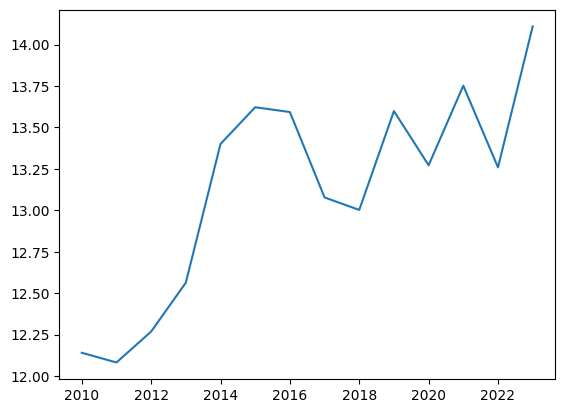

In [194]:
# 차트 예시
import matplotlib.pyplot as plt

meanData = data.groupby('년도')[['평균기온']].mean()
plt.plot(meanData)
plt.show()

In [202]:
# 내 생일날 중에서 최고기온의 연도는?
birthMaxData = birthData.loc[(birthData['최고기온'] == birthData['최고기온'].max())]
birthMaxData = birthMaxData.reset_index()
print("내 생일의 최고 기온은", birthMaxData.loc[0, "년도"], "년의", birthMaxData.loc[0, '최고기온'], "도 입니다.")

내 생일의 최고 기온은 2021 년의 16.2 도 입니다.


In [203]:
# 내 생일날 중에서 최저기온의 연도는?
birthMinData = birthData.loc[(birthData['최저기온'] == birthData['최저기온'].min())]
birthMinData = birthMinData.reset_index()
print("내 생일의 최저 기온은", birthMinData.loc[0, "년도"], "년의",birthMinData.loc[0, '최저기온'], "도 입니다.")

내 생일의 최저 기온은 2012 년의 -5.9 도 입니다.


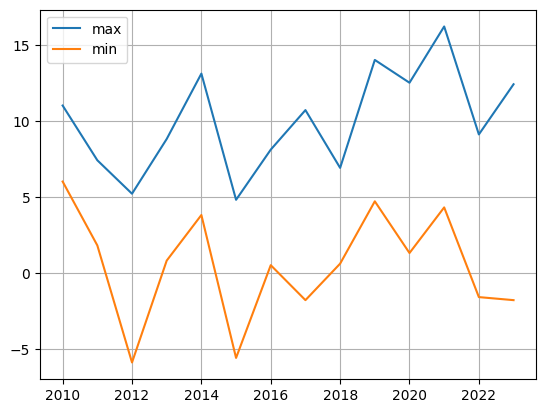

In [201]:
# 3단계 :'년도(2010 ~ 2023)'별로 '최고기온'과 '최저기온' 꺽은선 그래프 작성, birthData 변수 이용
# 차트 사이즈 : 가로 - 12 inch, 세로 - 10 inch

plt.plot(birthData['년도'], birthData['최고기온'], label='max')
plt.plot(birthData['년도'], birthData['최저기온'], label='min')
plt.grid() # 눈금
plt.legend() # max, min 확인표 생성
plt.show()